# Load the data

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import numpy as np
from scipy import stats
import random
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [37]:
od13_mtcentre=pd.read_csv(r'/content/drive/MyDrive/od13_Regdomi8_2_MTLCENTRE.csv')
od03_mtllaval=pd.read_csv(r'/content/drive/MyDrive/od03_Regdomi8_6_MTLLAVAL.csv')
od13_mtllaval= pd.read_csv(r'/content/drive/MyDrive/od13_Regdomi8_6_MTLLAVAL.csv')
od03_mtcentre=pd.read_csv(r'/content/drive/MyDrive/od03_Regdomi8_2_MTLCENTRE.csv')

In [38]:
#all column name capital

od03_mtcentre.columns = od03_mtcentre.columns.str.upper()
od03_mtllaval.columns = od03_mtllaval.columns.str.upper()




In [ ]:
od13_mtcentre

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,1000013,1,299590,5048131,110,2,3,2,47,2,...,1,1100,5,110,2,110,2,16.36,T,T
1,1000013,1,299590,5048131,110,2,3,2,47,2,...,2,1155,3,110,2,110,2,16.36,NaN,NaN
2,1000013,2,299590,5048131,110,2,3,2,47,1,...,1,730,1,110,2,101,1,20.13,NaN,T
3,1000013,2,299590,5048131,110,2,3,2,47,1,...,2,1100,1,101,1,101,1,20.13,NaN,NaN
4,1000013,2,299590,5048131,110,2,3,2,47,1,...,3,1330,1,101,1,308,5,20.13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110021,9033510,1,293941,5044832,107,2,2,1,20,2,...,1,1600,4,107,2,574,8,41.04,T,T
110022,9033510,1,293941,5044832,107,2,2,1,20,2,...,2,2400,3,574,8,107,2,41.04,NaN,NaN
110023,9033510,2,293941,5044832,107,2,2,1,24,1,...,1,1600,4,107,2,574,8,39.90,NaN,T
110024,9033510,2,293941,5044832,107,2,2,1,24,1,...,2,2400,3,574,8,107,2,39.90,NaN,NaN


In [ ]:
od03_mtcentre

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,134,1,298617,5043563,106,2,2,1,39,1,...,1,730,1,106.0,2.0,106.0,2.0,26.33,T,T
1,134,1,298617,5043563,106,2,2,1,39,1,...,2,1700,3,106.0,2.0,106.0,2.0,26.33,NaN,NaN
2,134,2,298617,5043563,106,2,2,1,42,2,...,1,800,1,106.0,2.0,110.0,2.0,24.46,NaN,T
3,134,2,298617,5043563,106,2,2,1,42,2,...,2,1630,3,110.0,2.0,106.0,2.0,24.46,NaN,NaN
4,274,1,297828,5042001,106,2,2,1,64,1,...,1,800,4,106.0,2.0,309.0,5.0,25.24,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81488,259997,1,296996,5045637,109,2,2,0,25,1,...,5,1700,3,109.0,2.0,109.0,2.0,27.32,NaN,NaN
81489,259997,2,296996,5045637,109,2,2,0,25,1,...,1,1000,1,109.0,2.0,109.0,2.0,27.32,NaN,T
81490,259997,2,296996,5045637,109,2,2,0,25,1,...,2,1900,3,109.0,2.0,109.0,2.0,27.32,NaN,NaN
81491,259999,1,296991,5045629,109,2,2,1,79,1,...,0,0,0,NaN,NaN,NaN,NaN,27.71,T,T


In [ ]:
od03_mtllaval

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,3182,1,297373,5057568,408,6,2,1,29,2,...,1,645,1,408.0,6.0,109.0,2.0,21.81,T,T
1,3182,1,297373,5057568,408,6,2,1,29,2,...,2,1545,3,109.0,2.0,408.0,6.0,21.81,NaN,NaN
2,3182,1,297373,5057568,408,6,2,1,29,2,...,3,1800,5,408.0,6.0,408.0,6.0,21.81,NaN,NaN
3,3182,1,297373,5057568,408,6,2,1,29,2,...,4,1930,3,408.0,6.0,408.0,6.0,21.81,NaN,NaN
4,3182,2,297373,5057568,408,6,2,1,11,2,...,1,810,2,408.0,6.0,408.0,6.0,18.05,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31273,240626,1,282637,5051410,404,6,1,1,37,1,...,5,1545,1,642.0,7.0,642.0,7.0,31.40,NaN,NaN
31274,240626,1,282637,5051410,404,6,1,1,37,1,...,6,1620,3,642.0,7.0,404.0,6.0,31.40,NaN,NaN
31275,259027,1,289757,5048078,406,6,3,1,49,1,...,0,0,0,NaN,NaN,NaN,NaN,24.62,T,T
31276,259027,2,289757,5048078,406,6,3,1,39,2,...,0,0,0,NaN,NaN,NaN,NaN,22.03,NaN,T


In [ ]:
od13_mtllaval

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,1000016,1,290831,5047206,406,6,1,0,32,1,...,1,830,1,406,6,102,1,47.72,T,T
1,1000016,1,290831,5047206,406,6,1,0,32,1,...,2,2400,3,102,1,406,6,47.72,NaN,NaN
2,1000032,1,286639,5045158,403,6,3,2,59,2,...,1,1000,5,403,6,402,6,28.16,T,T
3,1000032,1,286639,5045158,403,6,3,2,59,2,...,2,1035,3,402,6,403,6,28.16,NaN,NaN
4,1000032,2,286639,5045158,403,6,3,2,60,1,...,1,1000,5,403,6,402,6,26.45,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39238,9032841,2,283249,5044460,403,6,3,1,30,2,...,3,1200,3,101,1,403,6,30.51,NaN,NaN
39239,9032841,2,283249,5044460,403,6,3,1,30,2,...,4,1655,6,403,6,403,6,30.51,NaN,NaN
39240,9032841,2,283249,5044460,403,6,3,1,30,2,...,5,1700,3,403,6,403,6,30.51,NaN,NaN
39241,9032841,3,283249,5044460,403,6,3,1,6,2,...,1,730,2,403,6,403,6,24.06,NaN,T


# Data segmenation



*   Segment A: women between the ages of 20 and 29
*   Segment B: women between the ages of 30 and 39



In [85]:
od13_mtcentre_w20_25 = od13_mtcentre[(od13_mtcentre["AGE"] > 19) &
                                    (od13_mtcentre["AGE"] < 26) &
                                    (od13_mtcentre["SEXE"] == 2)&
                                     (od13_mtcentre["P_STATUT"]==3)]
od03_mtcentre_w20_25 = od03_mtcentre[(od03_mtcentre["AGE"] > 19) &
                                    (od03_mtcentre["AGE"] < 26) &
                                    (od03_mtcentre["SEXE"] == 2)&
                                     (od03_mtcentre["P_STATUT"]==3)]
od13_mtllaval_w20_25 = od13_mtllaval[(od13_mtllaval["AGE"] > 19) &
                                    (od13_mtllaval["AGE"] < 26) &
                                    (od13_mtllaval["SEXE"] == 2)&
                                     (od13_mtllaval["P_STATUT"]==3)]
od03_mtllaval_w20_25 = od03_mtllaval[(od03_mtllaval["AGE"] > 19) &
                                    (od03_mtllaval["AGE"] < 26) &
                                    (od03_mtllaval["SEXE"] == 2)&
                                     (od03_mtllaval["P_STATUT"]==3)]

In [86]:
od13_mtcentre_w26_30 = od13_mtcentre[(od13_mtcentre["AGE"] > 25) &
                                    (od13_mtcentre["AGE"] < 31) &
                                    (od13_mtcentre["SEXE"] == 2)&
                                     (od13_mtcentre["P_STATUT"]==1)]
od03_mtcentre_w26_30 = od03_mtcentre[(od03_mtcentre["AGE"] > 25) &
                                    (od03_mtcentre["AGE"] < 31) &
                                    (od03_mtcentre["SEXE"] == 2)&
                                     (od03_mtcentre["P_STATUT"]==1)]
od13_mtllaval_w26_30 = od13_mtllaval[(od13_mtllaval["AGE"] > 25) &
                                    (od13_mtllaval["AGE"] < 31) &
                                    (od13_mtllaval["SEXE"] == 2)&
                                     (od13_mtllaval["P_STATUT"]==1)]
od03_mtllaval_w26_30 = od03_mtllaval[(od03_mtllaval["AGE"] > 25) &
                                    (od03_mtllaval["AGE"] < 31) &
                                    (od03_mtllaval["SEXE"] == 2)&
                                     (od03_mtllaval["P_STATUT"]==1)]

add a person column

In [87]:
#SgA
od13_mtcentre_w20_25['person'] = od13_mtcentre_w20_25['FEUILLET'].astype(str) + od13_mtcentre_w20_25['RANG'].astype(str)
od03_mtcentre_w20_25['person'] = od03_mtcentre_w20_25['FEUILLET'].astype(str) + od03_mtcentre_w20_25['RANG'].astype(str)
od13_mtllaval_w20_25['person'] = od13_mtllaval_w20_25['FEUILLET'].astype(str) + od13_mtllaval_w20_25['RANG'].astype(str)
od03_mtllaval_w20_25['person'] = od03_mtllaval_w20_25['FEUILLET'].astype(str) + od03_mtllaval_w20_25['RANG'].astype(str)

#SegB

od13_mtcentre_w26_30['person'] = od13_mtcentre_w26_30['FEUILLET'].astype(str) + od13_mtcentre_w26_30['RANG'].astype(str)
od03_mtcentre_w26_30['person'] = od03_mtcentre_w26_30['FEUILLET'].astype(str) + od03_mtcentre_w26_30['RANG'].astype(str)
od13_mtllaval_w26_30['person'] = od13_mtllaval_w26_30['FEUILLET'].astype(str) + od13_mtllaval_w26_30['RANG'].astype(str)
od03_mtllaval_w26_30['person'] = od03_mtllaval_w26_30['FEUILLET'].astype(str) + od03_mtllaval_w26_30['RANG'].astype(str)





<ipython-input-87-6b94695eacce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtcentre_w20_25['person'] = od13_mtcentre_w20_25['FEUILLET'].astype(str) + od13_mtcentre_w20_25['RANG'].astype(str)
<ipython-input-87-6b94695eacce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w20_25['person'] = od03_mtcentre_w20_25['FEUILLET'].astype(str) + od03_mtcentre_w20_25['RANG'].astype(str)
<ipython-input-87-6b94695eacce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
od13_mtcentre_w20_25.head()

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS,person
196,1000368,3,294408,5046377,108,2,3,2,21,2,...,930,2,108,2,101,1,29.92,NaN,T,10003683
197,1000368,3,294408,5046377,108,2,3,2,21,2,...,1115,3,101,1,108,2,29.92,NaN,NaN,10003683
447,1001066,2,293855,5046874,108,2,3,1,20,2,...,1215,2,108,2,105,2,32.49,NaN,T,10010662
448,1001066,2,293855,5046874,108,2,3,1,20,2,...,1630,3,105,2,108,2,32.49,NaN,NaN,10010662
591,1001427,1,303603,5051589,112,2,3,1,22,2,...,700,2,112,2,111,2,33.45,T,T,10014271


In [ ]:
od13_mtcentre_w20_25

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS,person
196,1000368,3,294408,5046377,108,2,3,2,21,2,...,930,2,108,2,101,1,29.92,NaN,T,10003683
197,1000368,3,294408,5046377,108,2,3,2,21,2,...,1115,3,101,1,108,2,29.92,NaN,NaN,10003683
447,1001066,2,293855,5046874,108,2,3,1,20,2,...,1215,2,108,2,105,2,32.49,NaN,T,10010662
448,1001066,2,293855,5046874,108,2,3,1,20,2,...,1630,3,105,2,108,2,32.49,NaN,NaN,10010662
591,1001427,1,303603,5051589,112,2,3,1,22,2,...,700,2,112,2,111,2,33.45,T,T,10014271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110011,9032611,1,294063,5045566,108,2,1,0,23,2,...,1345,3,108,2,108,2,44.61,NaN,NaN,90326111
110012,9032611,1,294063,5045566,108,2,1,0,23,2,...,1600,1,108,2,101,1,44.61,NaN,NaN,90326111
110013,9032611,1,294063,5045566,108,2,1,0,23,2,...,2130,3,101,1,108,2,44.61,NaN,NaN,90326111
110021,9033510,1,293941,5044832,107,2,2,1,20,2,...,1600,4,107,2,574,8,41.04,T,T,90335101


## Estimae total poulation

In [8]:
#mtcentre
# SEG A
#group 2013

new_od13_mtcentre_w20_25=od13_mtcentre_w20_25.fillna(0)
TPmt_segA13 = od13_mtcentre_w20_25['FACPER'].sum()


#group 2003
new_od03_mtcentre_w20_25=od03_mtcentre_w20_25.fillna(0)
TPmt_segA03 = new_od03_mtcentre_w20_25["FACPER"].sum()


#SEG B
#group 2013
new_od13_mtcentre_w26_30=od13_mtcentre_w26_30.fillna(0)
TPmt_segB13 = new_od13_mtcentre_w26_30["FACPER"].sum()


#group 2003

new_od03_mtcentre_w26_30=od03_mtcentre_w26_30.fillna(0)
TPmt_segB03 = new_od03_mtcentre_w26_30["FACPER"].sum()

#Laval
# SEG A
#group 2013

new_od13_mtllaval_w20_25=od13_mtllaval_w20_25.fillna(0)
TPlaval_segA13 = new_od13_mtllaval_w20_25["FACPER"].sum()

#group 2003

new_od03_mtllaval_w20_25=od03_mtllaval_w20_25.fillna(0)
TPlaval_segA03 = new_od03_mtllaval_w20_25["FACPER"].sum()

#seg B
#2013

new_od13_mtllaval_w26_30=od13_mtllaval_w26_30.fillna(0)
TPlaval_segB13 = new_od13_mtllaval_w26_30["FACPER"].sum()

#2003

new_od03_mtllaval_w26_30=od03_mtllaval_w26_30.fillna(0)
TPlaval_segB03 = new_od03_mtllaval_w26_30["FACPER"].sum()

In [ ]:
TPlaval_segB03

21977.66

frequency distribution

Seg B

In [9]:
import pandas as pd

# Assuming your DataFrame is named od03_mtllaval_w26_30

# Step 1: Calculate work trip counts per person
work_trip_counts = od03_mtllaval_w26_30.groupby('person')['MOTIF'].apply(lambda x: (x==1).sum())

# Step 2: Sum FACPER for all trips per person
facper_sums = od03_mtllaval_w26_30.groupby('person')['FACPER'].sum()

# Step 3: Assign the FACPER sum to the corresponding work trip count
facper_tally = facper_sums.groupby(work_trip_counts).sum()

# The result is in facper_tally, where the index represents the number of work trips,
# and the values are the total FACPER sums for persons with that many trips.


In [ ]:
facper_tally

MOTIF
0     2782.75
1    18041.54
2      845.67
3      307.70
Name: FACPER, dtype: float64

In [ ]:
sum(facper_tally)

21977.66

# Visualization

In [10]:

def calculate_facper_proportion(dataset, total_population,motif):
    # Calculate work trip counts per person
    work_trip_counts = dataset.groupby('person')['MOTIF'].apply(lambda x: (x == motif).sum())

    # Sum FACPER for all trips per person
    facper_sums = dataset.groupby('person')['FACPER'].sum()

    # Assign the FACPER sum to the corresponding work trip count
    facper_tally = facper_sums.groupby(work_trip_counts).sum()

    # Divide each tally by the total population
    proportion = (facper_tally / total_population)*100

    return proportion

In [ ]:
calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,1)

MOTIF
0    12.661721
1    82.090359
2     3.847862
3     1.400058
Name: FACPER, dtype: float64

In [ ]:
calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,1)

MOTIF
0    17.822081
1    77.035668
2     5.142251
Name: FACPER, dtype: float64

frequency dist seg b laval
1. Motif 1 work
2. Motif 2 Study
3. Motif 4 leisure
4. Motif 5 SHopping
5. Motif 6 others

## Motif = Work

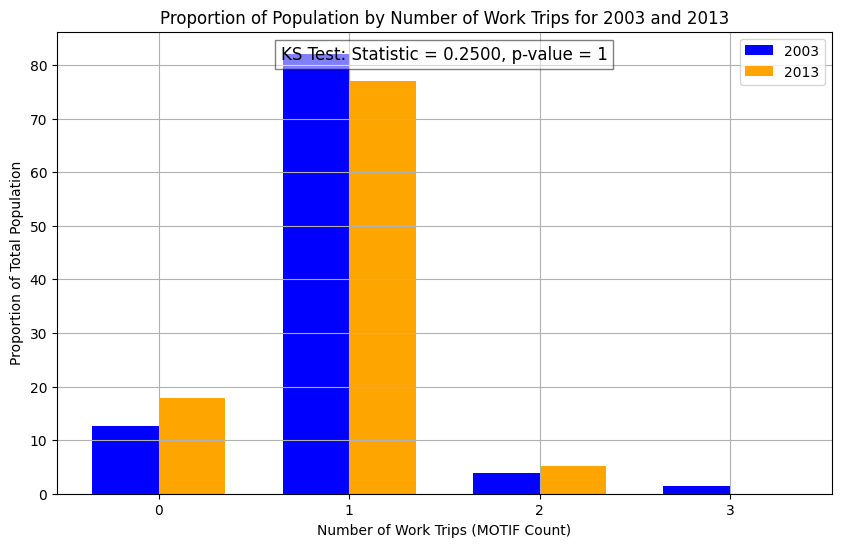

In [21]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,1)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,1)

combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Number of Work Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population')
plt.title('Proportion of Population by Number of Work Trips for 2003 and 2013')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif = Study

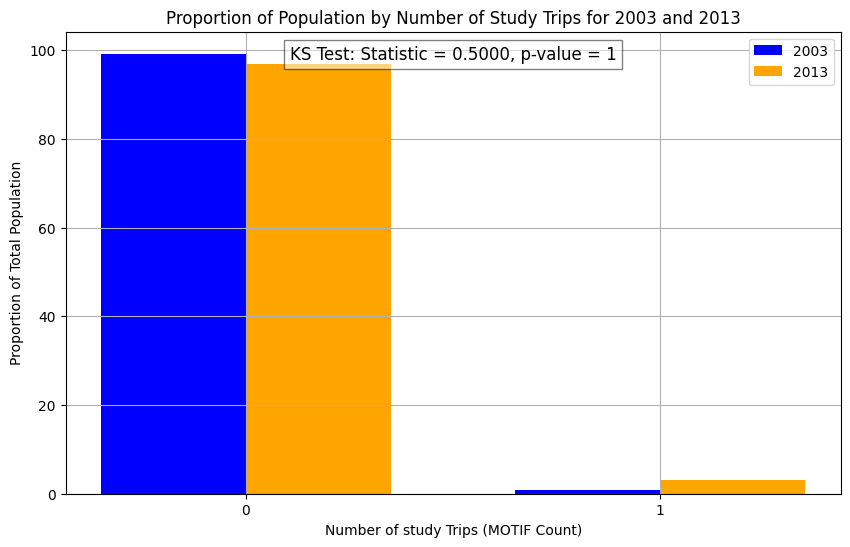

In [22]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,2)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,2)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Number of study Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population')
plt.title('Proportion of Population by Number of Study Trips for 2003 and 2013')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif = Other trips

<ipython-input-23-a5e7d6288ac9>:14: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


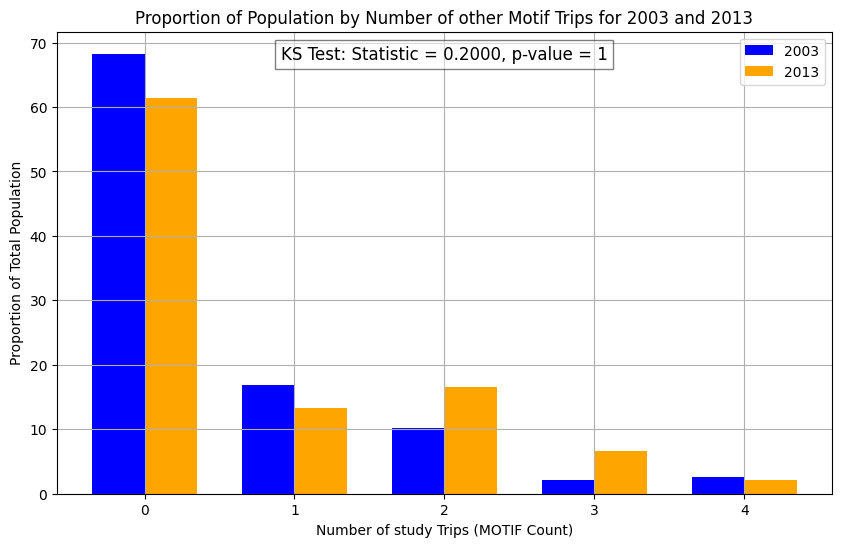

In [23]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,6)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,6)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Number of study Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population')
plt.title('Proportion of Population by Number of other Motif Trips for 2003 and 2013')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif Leisure activities

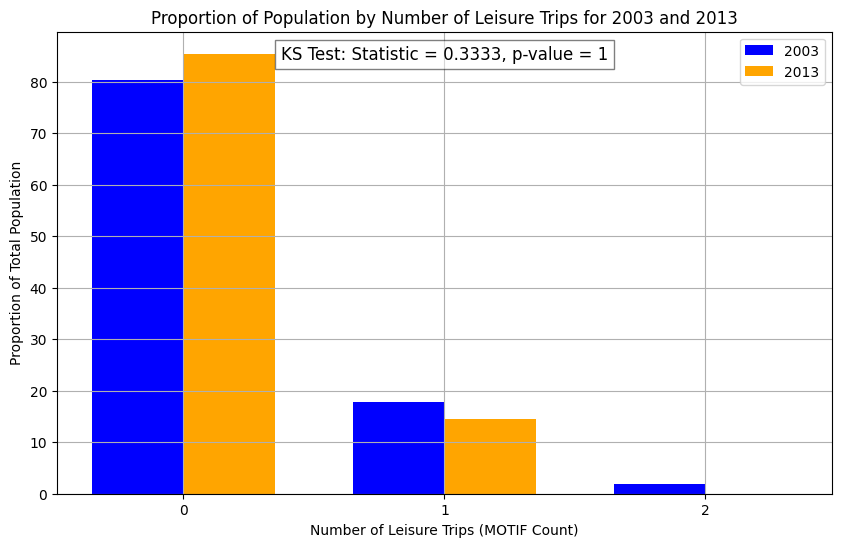

In [24]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,4)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,4)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Number of Leisure Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population')
plt.title('Proportion of Population by Number of Leisure Trips for 2003 and 2013')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif Shopping

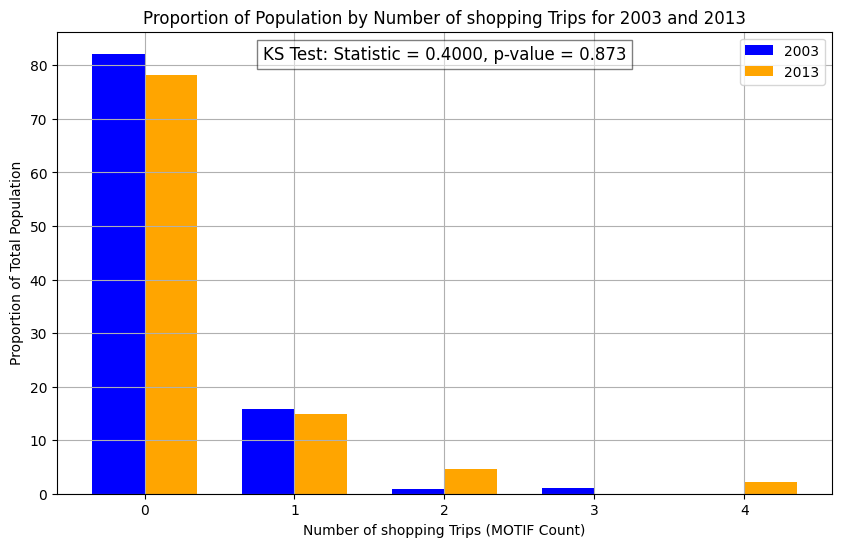

In [25]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,5)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,5)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Number of shopping Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population')
plt.title('Proportion of Population by Number of shopping Trips for 2003 and 2013')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

K-S test

In [18]:
stats.kstest(proportion_2003, proportion_2013)


KstestResult(statistic=0.4, pvalue=0.873015873015873, statistic_location=1.083281841651932, statistic_sign=1)

Visulization

<ipython-input-56-a55c7b83a3c7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w26_30['motif'] = od03_mtcentre_w26_30['motif'].map(category_map)
<ipython-input-56-a55c7b83a3c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w20_25['motif'] = od03_mtcentre_w20_25['motif'].map(category_map)


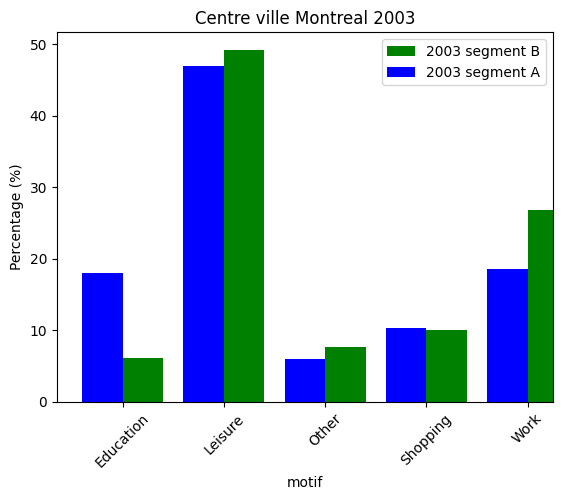

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames
# df1 and df2 are your dataframes

# Mapping for numbers to category labels
category_map = {1: 'Work', 2: 'Education', 3: 'Leisure', 4: 'Shopping', 5: 'Other'}

# Apply mapping and filter categories
od03_mtcentre_w26_30['motif'] = od03_mtcentre_w26_30['motif'].map(category_map)
od03_mtcentre_w20_25['motif'] = od03_mtcentre_w20_25['motif'].map(category_map)
od03_mtcentre_w26_30 = od03_mtcentre_w26_30[od03_mtcentre_w26_30['motif'].notnull()]
od03_mtcentre_w20_25 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['motif'].notnull()]

# Group by 'Category' and get the percentage
grouped1 = od03_mtcentre_w26_30.groupby('motif').size() / len(od03_mtcentre_w26_30) * 100
grouped2 = od03_mtcentre_w20_25.groupby('motif').size() / len(od03_mtcentre_w20_25) * 100

# Convert to DataFrame
df_grouped1 = grouped1.reset_index(name='Percentage')
df_grouped2 = grouped2.reset_index(name='Percentage')

# Set Category as index
df_grouped1.set_index('motif', inplace=True)
df_grouped2.set_index('motif', inplace=True)

# Plotting
fig, ax = plt.subplots()
df_grouped1['Percentage'].plot(kind='bar', color='green', ax=ax, width=0.4, position=0)
df_grouped2['Percentage'].plot(kind='bar', color='blue', ax=ax, width=0.4, position=1)

ax.set_ylabel('Percentage (%)')
ax.set_title('Centre ville Montreal 2003')
plt.xticks(rotation=45)
plt.legend(['2003 segment B', '2003 segment A'])
plt.show()


# Distribution of Departure time

In [94]:
import pandas as pd

def convert_time_column(df, column_name):
    # Convert to string and pad with zeros to ensure HHMM format
    time_str = df[column_name].astype(str).str.pad(width=4, fillchar='0')

    # Insert colon to get HH:MM format
    formatted_time = time_str.str[:2] + ':' + time_str.str[2:]

    # Custom function to handle times like '24:15'
    def handle_over_24(t):
        hours, minutes = map(int, t.split(':'))
        if hours >= 24:
            hours -= 24
        return f'{hours:02d}:{minutes:02d}'

    # Apply custom function and convert to datetime.time format
    formatted_time = formatted_time.apply(handle_over_24)
    time_object = pd.to_datetime(formatted_time, format='%H:%M').dt.time

    return time_object

# Example usage
od13_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od13_mtcentre_w20_25, 'HREDE')
od03_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od03_mtcentre_w20_25, 'HREDE')


<ipython-input-94-47db9697acaf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od13_mtcentre_w20_25, 'HREDE')
<ipython-input-94-47db9697acaf>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od03_mtcentre_w20_25, 'HREDE')


In [95]:
od13_mtcentre_w20_25f = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 1)]
od03_mtcentre_w20_25f = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 1)]


In [96]:
od13_mtcentre_w20_25f2 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 2)]
od03_mtcentre_w20_25f2 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 2)]


In [97]:
od13_mtcentre_w20_25f4 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 4)]
od03_mtcentre_w20_25f4 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 4)]


In [98]:
od13_mtcentre_w20_25f5 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 5)]
od03_mtcentre_w20_25f5 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 5)]


In [99]:
od13_mtcentre_w20_25f6 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 6)]
od03_mtcentre_w20_25f6 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 6)]


In [33]:
od13_mtcentre.shape

(110026, 23)

<ipython-input-45-cdc81776cb20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtcentre_w20_25f['Hourly_Interval'] = od13_mtcentre_w20_25f['DEPARTURE'].apply(convert_to_hourly_interval)


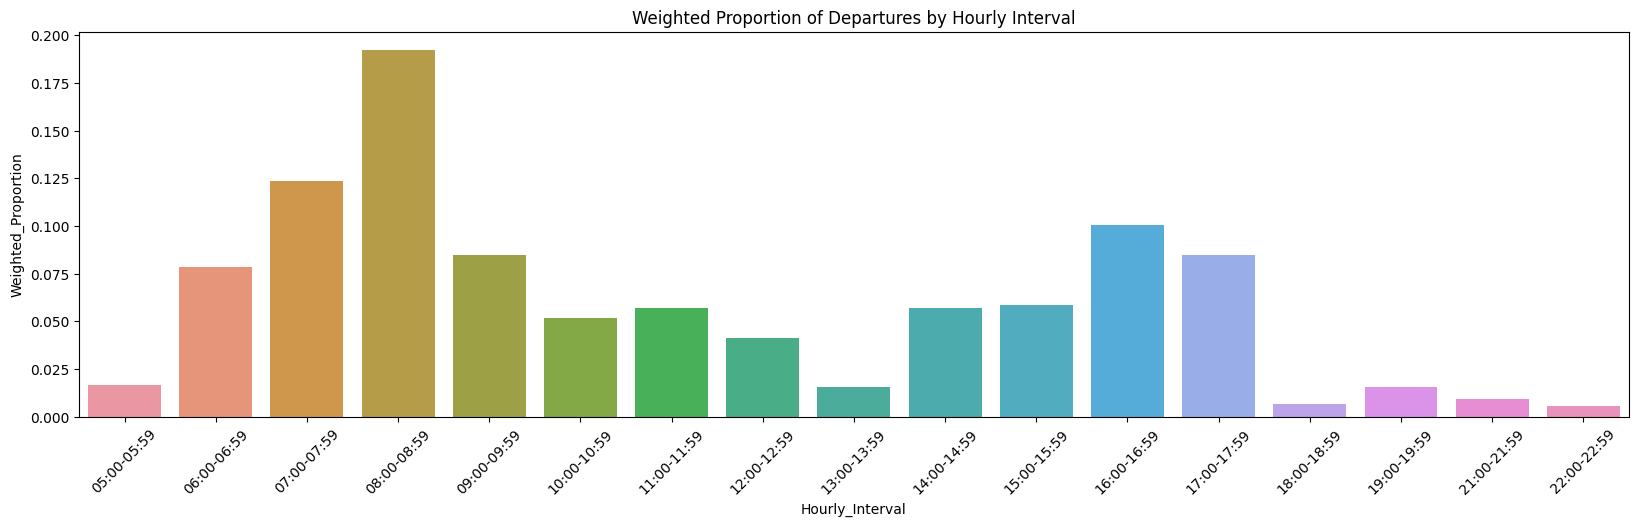

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

# Apply the function to your DEPARTURE column to create an hourly interval column
od13_mtcentre_w20_25f['Hourly_Interval'] = od13_mtcentre_w20_25f['DEPARTURE'].apply(convert_to_hourly_interval)

# Group by 'Hourly_Interval' and sum 'FACPER' for each group
weighted_counts = od13_mtcentre_w20_25f.groupby('Hourly_Interval')['FACPER'].sum()

# Total weight
total_weight = od13_mtcentre_w20_25f['FACPER'].sum()

# Calculate weighted proportions
weighted_proportions = weighted_counts / total_weight

# Reset index to convert the Series to a DataFrame
weighted_proportions_df = weighted_proportions.reset_index()
weighted_proportions_df.columns = ['Hourly_Interval', 'Weighted_Proportion']  # Rename columns for clarity

# Sort by 'Hourly_Interval'
weighted_proportions_df = weighted_proportions_df.sort_values('Hourly_Interval')

# Plotting
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=weighted_proportions_df, x='Hourly_Interval', y='Weighted_Proportion')

# Set title and labels
ax.set(title='Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 1 work

<ipython-input-60-0a69136a1d0a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-60-0a69136a1d0a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


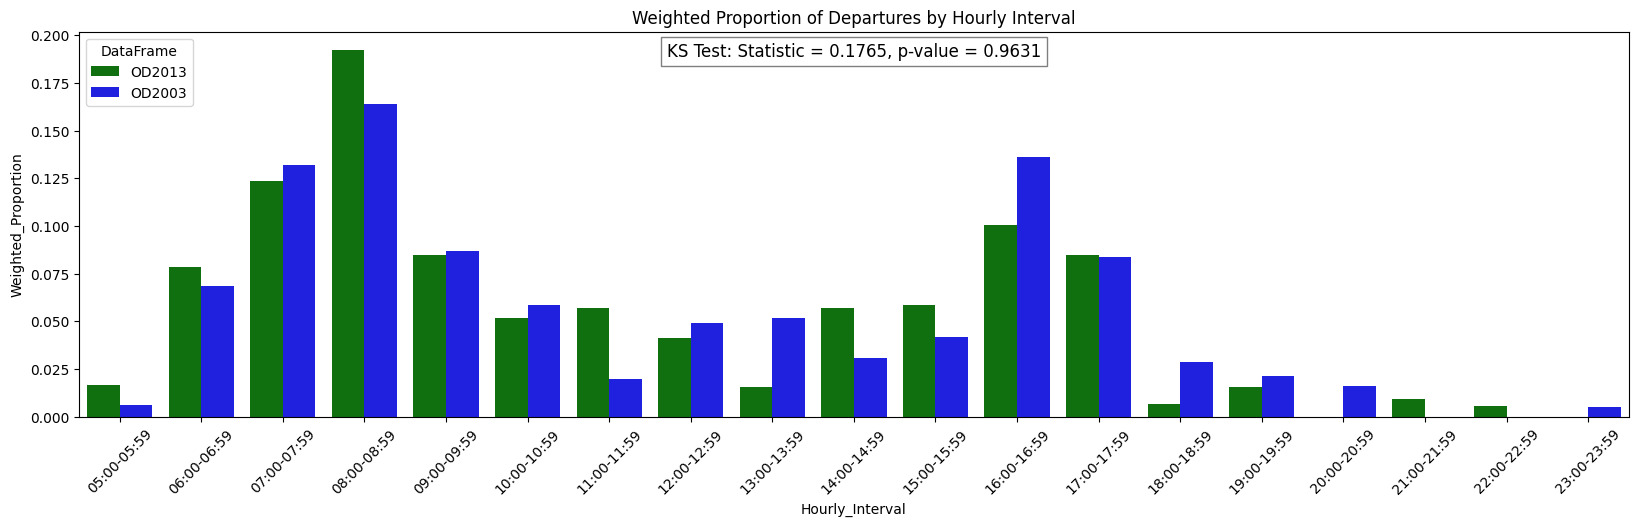

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 2 Study

<ipython-input-61-4b0ef4916e37>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-61-4b0ef4916e37>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


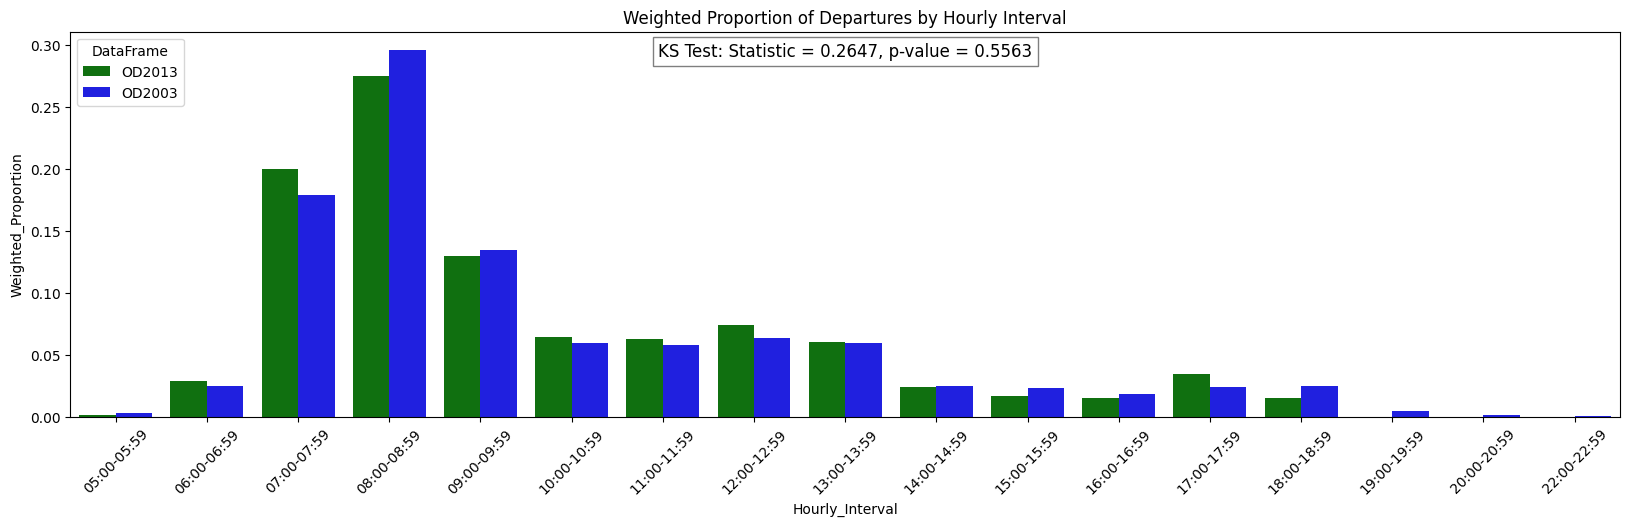

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f2)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f2)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 4 Other trips

<ipython-input-62-bb74bffc6c18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-62-bb74bffc6c18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


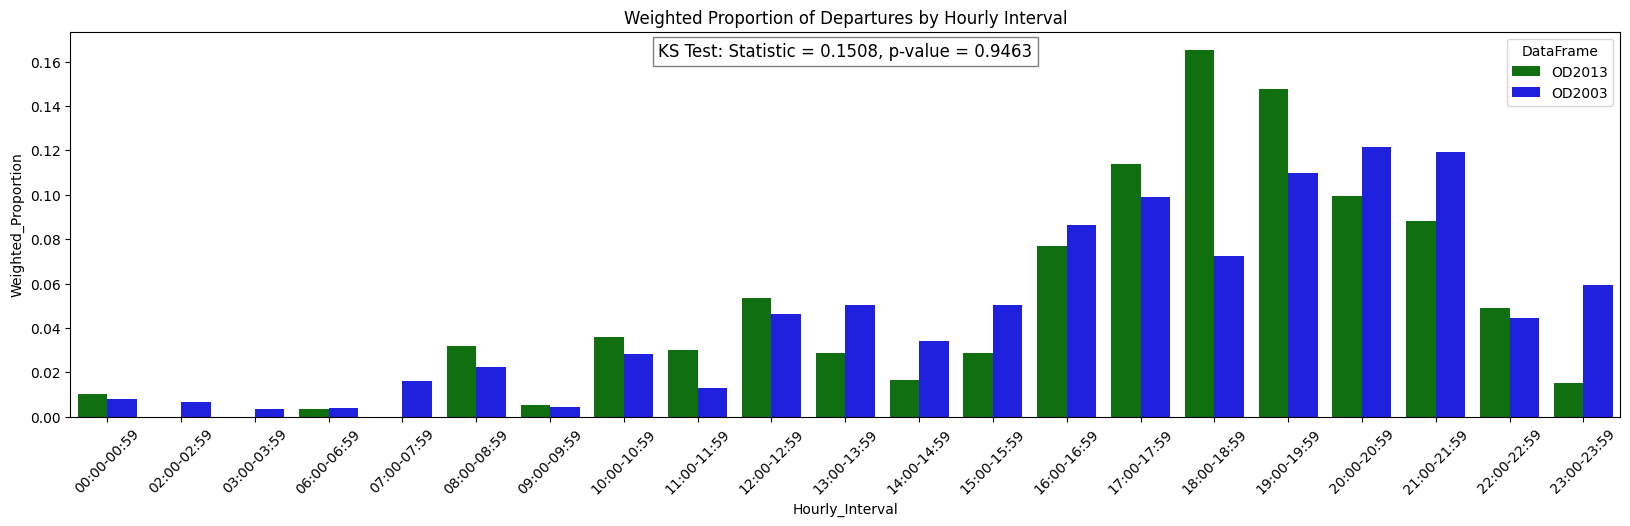

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f4)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f4)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 5 Leisure

<ipython-input-66-f0a6130ac04c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-66-f0a6130ac04c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


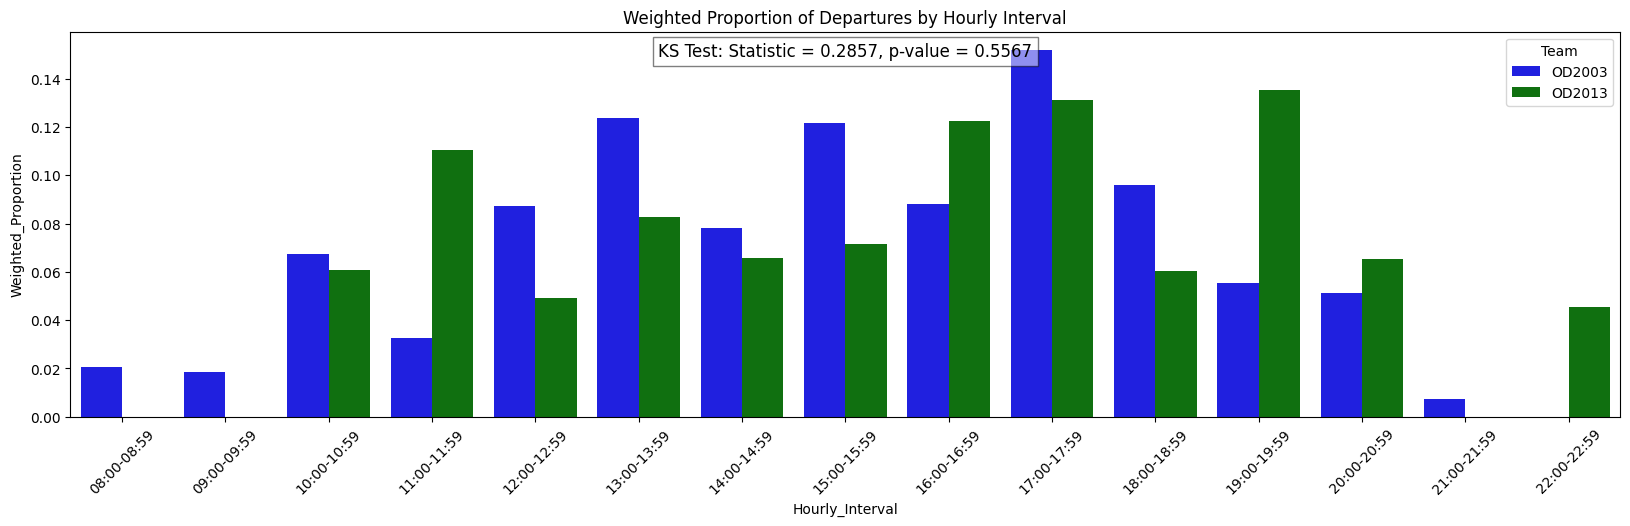

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f5)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f5)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(loc='upper right', title='Team')

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 6 Shopping

<ipython-input-67-79d87c3418e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-67-79d87c3418e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


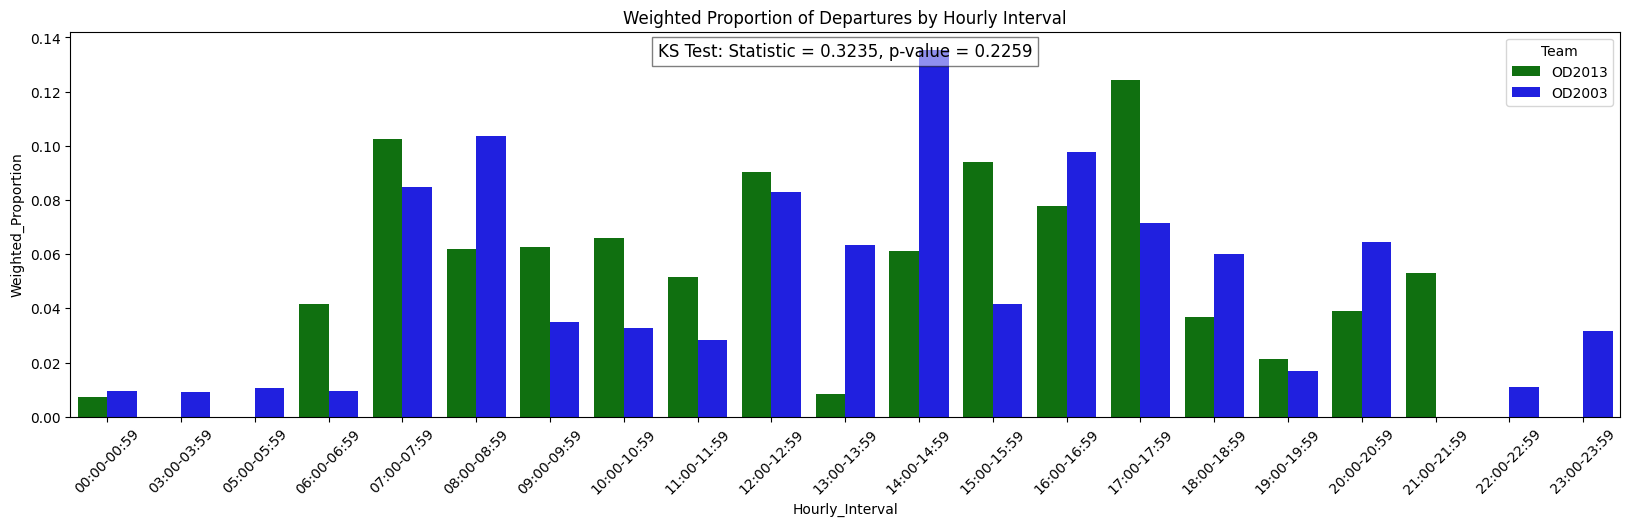

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f6)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f6)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(loc='upper right', title='Team')

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


# Activity duration

Focusing on the timeframe from 5 AM to 2 PM (14 PM), the study narrows down to trips commencing within the peak departure time range. This approach enables the creation of graphical representations showcasing the duration of various activities. For each selected trip, the departure time of an individual's subsequent trip is considered as the 'end time' of the current trip. Essentially, a trip is deemed to conclude when the next one commences.

This method, while practical, does integrate travel time into the calculation of activity duration. This inclusion is a limitation imposed by the data constraints of the Origin-Destination surveys, which do not provide separate information for travel time. Consequently, the activity durations computed in this manner will encompass both the time spent on the actual activity and the time spent traveling to the next activity. Despite this limitation, the approach provides valuable insights into the daily activity patterns within the selected time range.

In [68]:
import pandas as pd
import datetime

def time_to_datetime(time_obj):
    # Convert time to datetime object with a fixed date
    return datetime.datetime.combine(datetime.date.today(), time_obj)

def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'ID' and calculate the time difference
time_diffs = filtered_df.groupby('person')['DEPARTURE'].apply(calculate_time_diff)

# Drop NaT values which represent groups with only one record
time_diffs = time_diffs.dropna()

print(time_diffs)


person
10003683    105.0
10063943    315.0
10070292    120.0
10075681    198.0
10104752    320.0
            ...  
90115681    270.0
90126842    120.0
90221571    195.0
90237833    420.0
90326111     45.0
Name: DEPARTURE, Length: 199, dtype: object


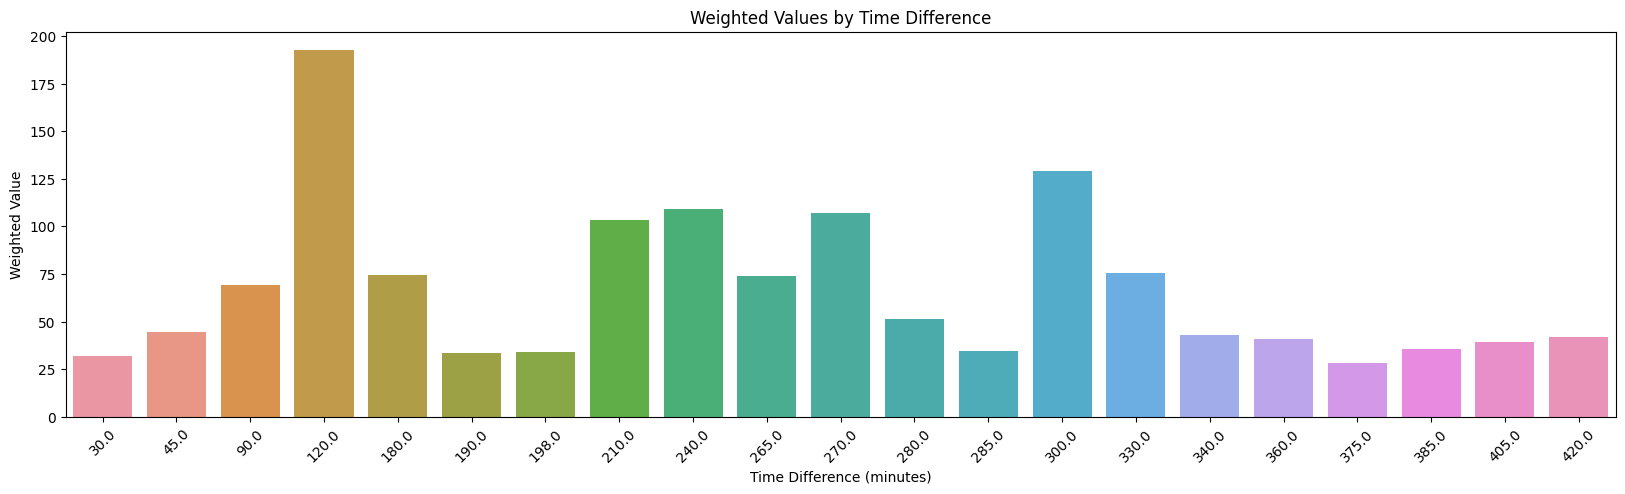

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming od13_mtcentre_w20_25f is the original DataFrame
# and time_diffs is a Series with 'person' as index and calculated time differences as values

# Merge time_diffs with the original DataFrame
merged_df = od13_mtcentre_w20_25f.merge(time_diffs, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum or average
grouped = merged_df.groupby('DEPARTURE_y')['FACPER'].sum()  # Replace 'sum' with 'mean' if average is preferred

# Reset index for plotting
grouped_df = grouped.reset_index()
grouped_df.columns = ['Time_Difference', 'Weighted_Value']

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=grouped_df, x='Time_Difference', y='Weighted_Value')

# Set title and labels
plt.title('Weighted Values by Time Difference')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Value')
plt.xticks(rotation=45)

plt.show()


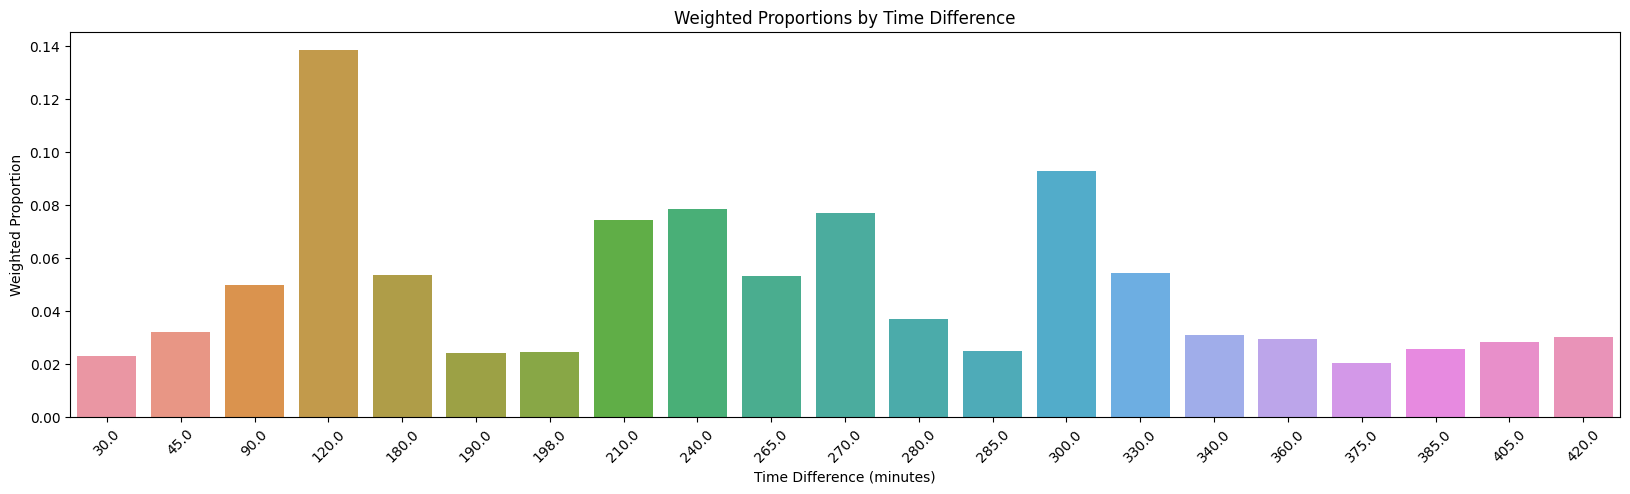

In [70]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs = filtered_df.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Merge time_diffs with the original DataFrame
merged_df = od13_mtcentre_w20_25f.merge(time_diffs, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum = merged_df.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value = merged_df['FACPER'].sum()

# Calculate proportions
grouped_proportions = grouped_sum / total_weighted_value
grouped_proportions_df = grouped_proportions.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=grouped_proportions_df, x='Time_Difference', y='Weighted_Proportion')

# Set title and labels
plt.title('Weighted Proportions by Time Difference')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.show()


## Activity duration work

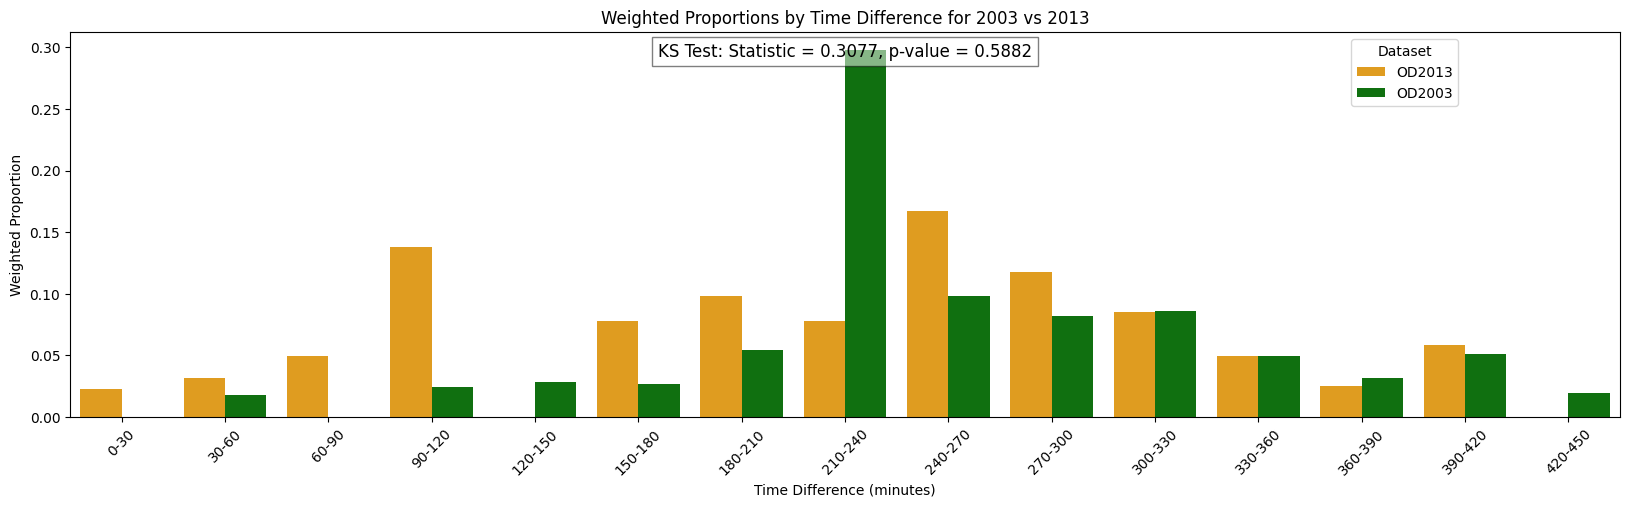

In [105]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])

# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Weighted Proportions by Time Difference for 2003 vs 2013')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration Study

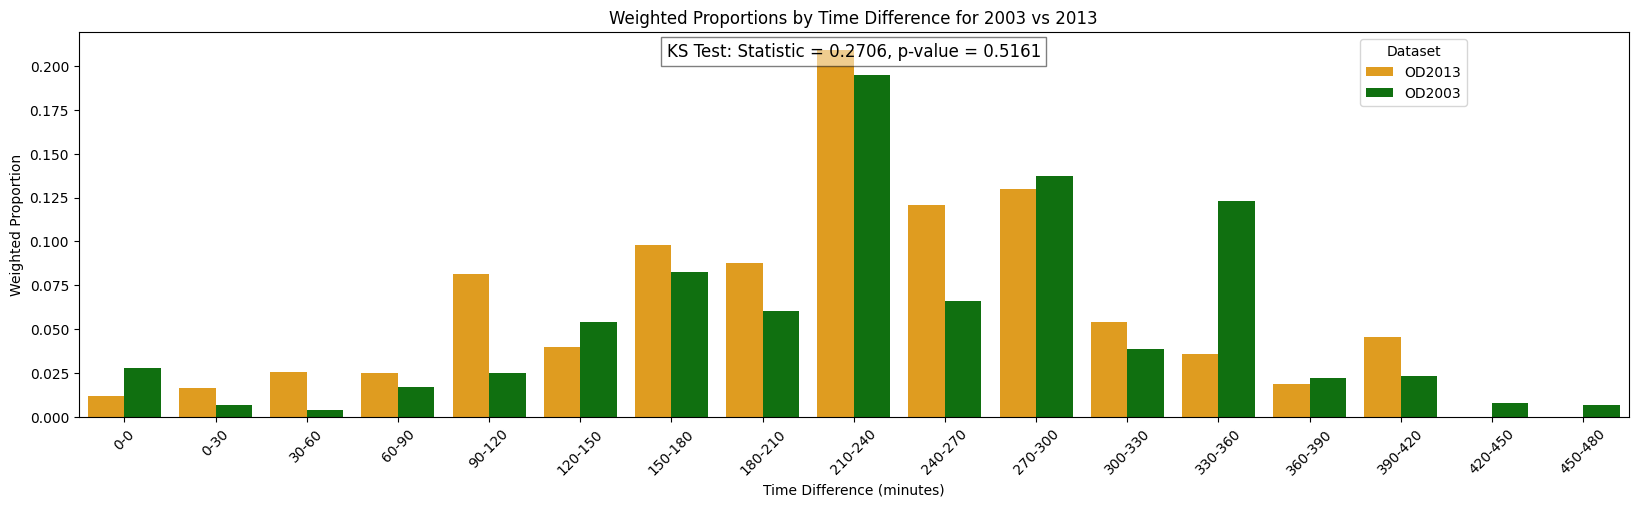

In [106]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f2.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f2.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Weighted Proportions by Time Difference for 2003 vs 2013')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration other trips

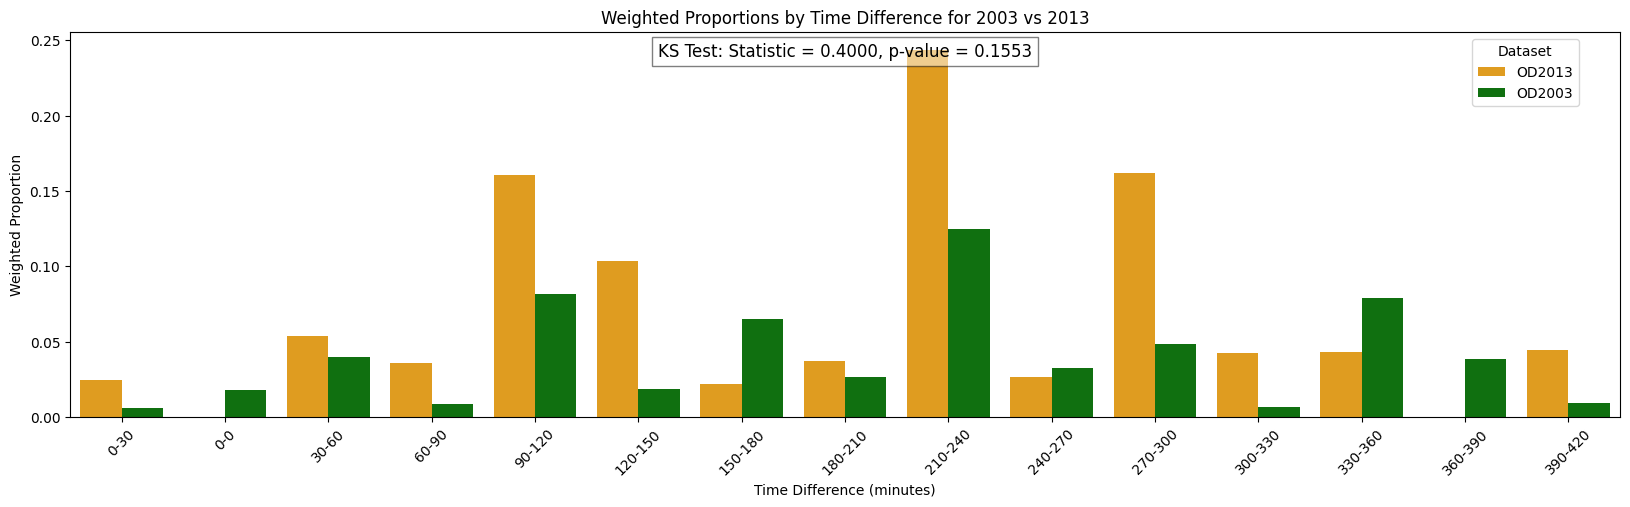

In [107]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f4.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f4.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Weighted Proportions by Time Difference for 2003 vs 2013')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration Leisure

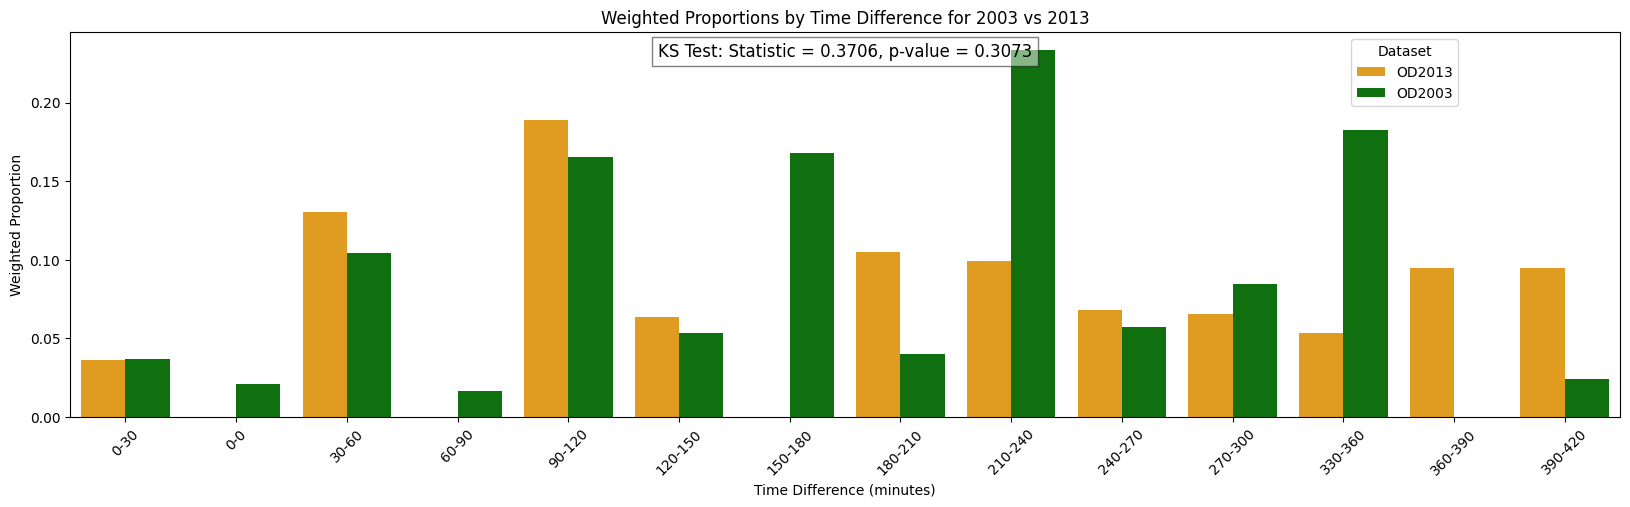

In [108]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f5.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f5.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Weighted Proportions by Time Difference for 2003 vs 2013')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration shopping

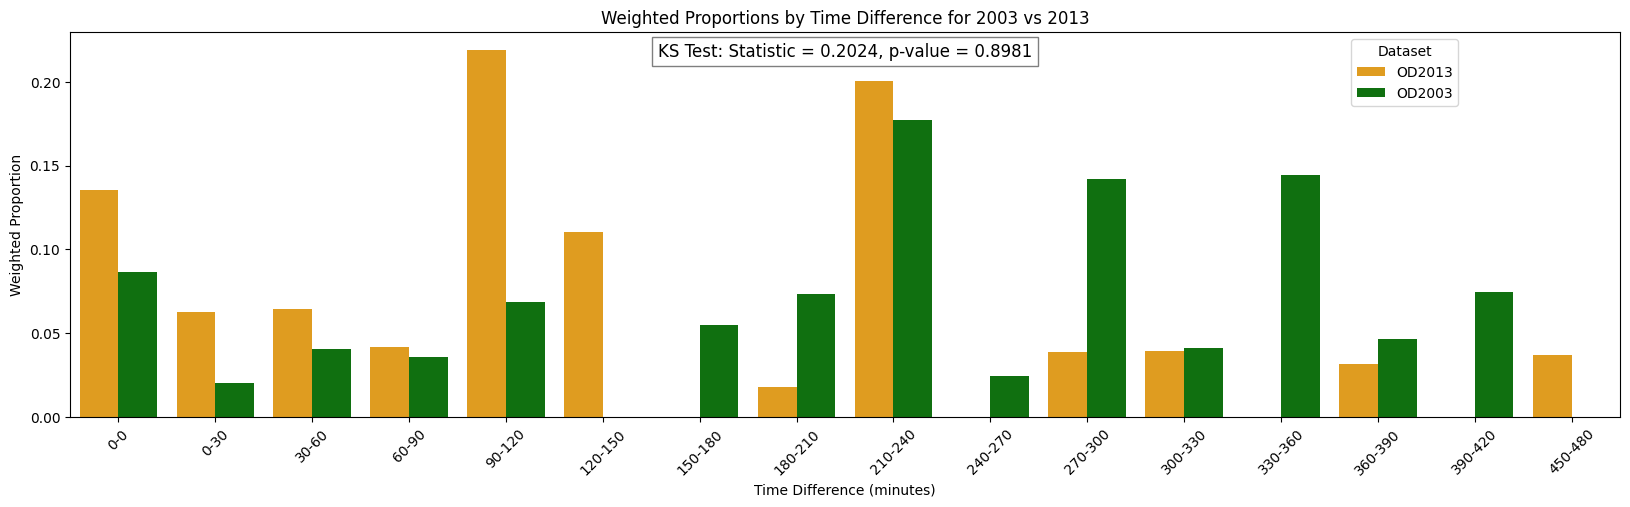

In [109]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f6.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f6.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Weighted Proportions by Time Difference for 2003 vs 2013')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


# Activity system

In [114]:
ds=pd.DataFrame()
ds =pd.get_dummies(od13_mtcentre_w20_25['MOTIF'])
ds['FACPER'] =od13_mtcentre_w20_25['FACPER']


In [115]:
ds

,1,2,3,4,5,6,7,8,FACPER
196,0,1,0,0,0,0,0,0,29.92
197,0,0,1,0,0,0,0,0,29.92
447,0,1,0,0,0,0,0,0,32.49
448,0,0,1,0,0,0,0,0,32.49
591,0,1,0,0,0,0,0,0,33.45
...,...,...,...,...,...,...,...,...,...
110011,0,0,1,0,0,0,0,0,44.61
110012,1,0,0,0,0,0,0,0,44.61
110013,0,0,1,0,0,0,0,0,44.61
110021,0,0,0,1,0,0,0,0,41.04


In [127]:
ds[(ds.iloc[:,0] == 1) & (ds.iloc[:,1] == 0)& (ds.iloc[:,2] == 0)& (ds.iloc[:,3] == 0)& (ds.iloc[:,4] == 0)& (ds.iloc[:,5] == 0)].mean()


1          1.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
FACPER    36.708475
dtype: float64

In [128]:
ds[(ds.iloc[:,0] == 0) & (ds.iloc[:,1] == 1)& (ds.iloc[:,2] == 0)& (ds.iloc[:,3] == 0)& (ds.iloc[:,4] == 0)& (ds.iloc[:,5] == 0)].mean()


1          0.000000
2          1.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
FACPER    35.417459
dtype: float64

In [129]:
ds[(ds.iloc[:,0] == 0) & (ds.iloc[:,1] == 0)& (ds.iloc[:,2] == 1)& (ds.iloc[:,3] == 0)& (ds.iloc[:,4] == 0)& (ds.iloc[:,5] == 0)].mean()


1          0.000000
2          0.000000
3          1.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
FACPER    35.821442
dtype: float64

In [130]:
ds[(ds.iloc[:,0] == 0) & (ds.iloc[:,1] == 0)& (ds.iloc[:,2] == 0)& (ds.iloc[:,3] == 1)& (ds.iloc[:,4] == 0)& (ds.iloc[:,5] == 0)].mean()


1          0.000000
2          0.000000
3          0.000000
4          1.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
FACPER    35.631719
dtype: float64

In [131]:
ds[(ds.iloc[:,0] == 0) & (ds.iloc[:,1] == 0)& (ds.iloc[:,2] == 0)& (ds.iloc[:,3] == 0)& (ds.iloc[:,4] == 1)& (ds.iloc[:,5] == 0)].mean()


1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          1.000000
6          0.000000
7          0.000000
8          0.000000
FACPER    37.773889
dtype: float64

In [132]:
ds[(ds.iloc[:,0] == 0) & (ds.iloc[:,1] == 0)& (ds.iloc[:,2] == 0)& (ds.iloc[:,3] == 0)& (ds.iloc[:,4] == 0)& (ds.iloc[:,5] == 1)].mean()


1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          1.000000
7          0.000000
8          0.000000
FACPER    37.947976
dtype: float64

# Random simulation
This section presents an analysis of the performance of frequency distributions generated in the previous section. Given the probability mass functions (pmf) calculated previously, it is possible to generate an activity system for each person by random simulation. The procedure is as follows:
1. For each person in the segment and region: a. For each motive:

i. Generate the cumulative distribution function (cdf) from the pdf of this motive;

ii. Generate a random value between 0 and 1;

iii. Lookup the activity frequency that corresponds to this random number in the cdf;

iv. Calculate the absolute error between the simulated frequency (𝑠!) and the observed frequency (𝑜!) for this motive. b. Sum the error for all motives for this person

2. Calculate the mean absolute error (MAE) as defined by
The Mean Absolute Error (MAE) is a measure used in statistics to quantify the accuracy of a forecast or a prediction. The formula for calculating MAE is:

The formula for Mean Absolute Error (MAE) is as follows:

MAE = $\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$

Where:
- \( n \) is the number of observations.
- \($y_i$) is the actual value of the \($ i $\)-th observation.
- \( $\hat{y_i} )$ is the predicted value for the \($ i $\)-th observation.
- $( |y_i - \hat{y_i}| )$ is the absolute error for each observation.

The MAE is calculated as the average of these absolute errors. The lower the MAE, the more accurate the model's predictions are considered to be. It's particularly useful because it gives a straightforward interpretation in the same units as the data, and being an average, it's easy to understand and communicate.

In [149]:
import pandas as pd
import numpy as np

# Assuming od13_mtcentre_w20_25 and od03_mtcentre_w20_25 are defined DataFrames
# Concatenate the "MOTIF" columns from both DataFrames
data = pd.concat([od13_mtcentre_w20_25["MOTIF"], od03_mtcentre_w20_25["MOTIF"]], axis=0).reset_index(drop=True)
df = pd.DataFrame(data)

def calculate_frequencies(df):
    observed_frequencies = {}
    for column in df.columns:
        # Count occurrences of each value
        counts = df[column].value_counts(normalize=True)
        # Store the frequencies
        observed_frequencies[column] = counts.to_dict()
    return observed_frequencies

# Calculate observed frequencies
observed_frequencies = calculate_frequencies(df)

# Convert to DataFrame for easier handling
observed_frequencies_df = pd.DataFrame(observed_frequencies)
print("Observed Frequencies:")
print(observed_frequencies_df)

def generate_cdf(column):
    cdf = np.cumsum(column)
    return cdf / cdf.iloc[-1]

def simulate_activity_frequency(cdf):
    random_value = np.random.uniform(0, 1)
    return cdf[cdf >= random_value].iloc[0]

def calculate_errors(df, observed_frequencies_df):
    total_error = 0
    for motive in df.columns:
        cdf = generate_cdf(df[motive])
        simulated_frequency = simulate_activity_frequency(cdf)
        observed_frequency = observed_frequencies_df[motive].iloc[0]
        absolute_error = abs(simulated_frequency - observed_frequency)
        total_error += absolute_error
    return total_error

# Calculate total error
total_error = calculate_errors(df, observed_frequencies_df)
n = 5  # Number of observations
mae = total_error / n  # Mean Absolute Error

print("Total Absolute Error:", total_error)
print("Mean Absolute Error (MAE):", mae)


Observed Frequencies:
      MOTIF
0  0.022998
1  0.060968
2  0.297895
3  0.430679
4  0.087872
5  0.039271
6  0.041658
7  0.018008
8  0.000651
Total Absolute Error: 0.9693115308303547
Mean Absolute Error (MAE): 0.19386230616607095


In [150]:
import pandas as pd
import numpy as np

# Assuming od13_mtcentre_w20_25 and od03_mtcentre_w20_25 are defined DataFrames
# Concatenate the "MOTIF" columns from both DataFrames
data = pd.concat([od13_mtcentre_w26_30["MOTIF"], od03_mtcentre_w26_30["MOTIF"]], axis=0).reset_index(drop=True)
df = pd.DataFrame(data)

def calculate_frequencies(df):
    observed_frequencies = {}
    for column in df.columns:
        # Count occurrences of each value
        counts = df[column].value_counts(normalize=True)
        # Store the frequencies
        observed_frequencies[column] = counts.to_dict()
    return observed_frequencies

# Calculate observed frequencies
observed_frequencies = calculate_frequencies(df)

# Convert to DataFrame for easier handling
observed_frequencies_df = pd.DataFrame(observed_frequencies)
print("Observed Frequencies:")
print(observed_frequencies_df)

def generate_cdf(column):
    cdf = np.cumsum(column)
    return cdf / cdf.iloc[-1]

def simulate_activity_frequency(cdf):
    random_value = np.random.uniform(0, 1)
    return cdf[cdf >= random_value].iloc[0]

def calculate_errors(df, observed_frequencies_df):
    total_error = 0
    for motive in df.columns:
        cdf = generate_cdf(df[motive])
        simulated_frequency = simulate_activity_frequency(cdf)
        observed_frequency = observed_frequencies_df[motive].iloc[0]
        absolute_error = abs(simulated_frequency - observed_frequency)
        total_error += absolute_error
    return total_error

# Calculate total error
total_error = calculate_errors(df, observed_frequencies_df)
n = 5 # Number of observations
mae = total_error / n  # Mean Absolute Error

print("Total Absolute Error:", total_error)
print("Mean Absolute Error (MAE):", mae)


Observed Frequencies:
      MOTIF
0  0.017991
1  0.319340
2  0.007710
3  0.416363
4  0.087385
5  0.052260
6  0.082459
7  0.016278
8  0.000214
Total Absolute Error: 0.5011355130253458
Mean Absolute Error (MAE): 0.10022710260506915
